Creating RawArray with float64 data, n_channels=6, n_times=203745
    Range : 0 ... 203744 =      0.000 ...   795.875 secs
Ready.
Effective window size : 8.000 (s)


<ipython-input-17-7dc007bbf605>:62: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()
<ipython-input-17-7dc007bbf605>:62: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  raw.plot_psd()


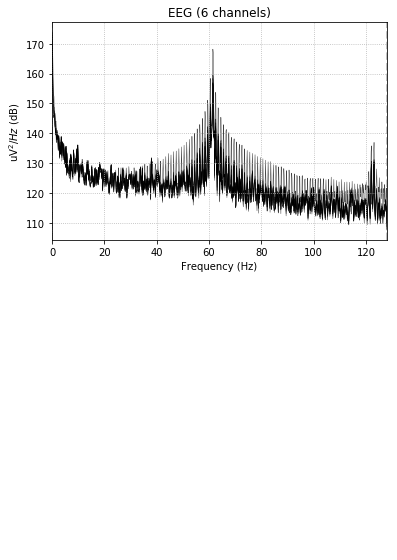

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt
import mne
import numpy as np

def load_data(file):
    with open(file, 'r') as f:
        data = f.readlines()
    
    compactData = []
    for i in range(len(data)):
        if i >= 6:
            compactData.append(data[i])

    return compactData

def convert(data):
    temp = []
    line = data.split(',')

    for e in range(len(line)):
        if e > 0 and e <= 6:
            temp.append(float(line[e]))
#         if e == 12:
#             temp.append(line[e].split('\n')[0].strip())
    
    return temp

def separate_data(data):
    index = []
    temp = []
    count = 0

    for e in range(len(data)):
        idx = data[e].split(',')[0]
        if int(idx) == 255 and count == 255:
            index.extend(temp)
            temp = []
            count = 0
        elif int(idx) == 255 and count < 255:
            temp = []
            count = 0
        else:
            temp.append(convert(data[e]))
            count += 1
    
    return index
    
data = load_data('dataset_alpha/RAW_00.txt')
newData = separate_data(data)

def sem_nome(data):
    newData = np.asarray(data)
    newData = newData.T
    ch_names = ['PO3', 'PO4', 'P8', 'O1', 'O2', 'P7']
    ch_types = ['eeg'] * 6

    info = mne.create_info(ch_names=ch_names, sfreq=256, ch_types=ch_types)
    raw = mne.io.RawArray(newData, info)

    raw.plot_psd()

sem_nome(newData)